In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Задание 1   
Даны значения величины заработной платы заемщиков банка (zp)    
и значения их поведенческого кредитного скоринга (ks):    
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].    
Используя математические операции, посчитать коэффициенты линейной регрессии,    
приняв за X заработную плату (то есть, zp - признак),    
а за y - значения скорингового балла (то есть, ks - целевая переменная).    
Произвести расчет как с использованием intercept, так и без.

In [2]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])

In [3]:
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [4]:
n = X.shape[0]
n

10

1. Расчет с использованием intercept

$$b = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2};$$

In [5]:
b = (np.mean(X * y) - np.mean(X) * np.mean(y)) / (np.mean(X ** 2) - np.mean(X) ** 2)
b

2.620538882402765

$$a = \overline{y} - b \cdot {\overline{x}}.$$

In [6]:
a = np.mean(y) - b * np.mean(X)
a

444.1773573243596

In [7]:
y_pred = a + b * X
y_pred

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

Text(0, 0.5, 'Значения кредитного скоринга')

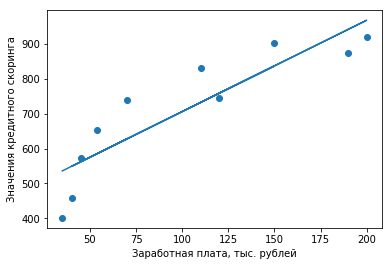

In [8]:
plt.scatter(X, y)
plt.plot(X, y_pred)
plt.xlabel('Заработная плата, тыс. рублей')
plt.ylabel('Значения кредитного скоринга')

In [9]:
def mse_(y = y, y_pred = y_pred, n = n):
    return np.sum((y_pred - y) ** 2) / n

In [10]:
mse_()

6470.414201176658

2. Расчет без intercept

$$W = (X \cdot X^T)^{-1} \cdot X \cdot y^T$$

In [11]:
X = X.reshape(1, 10)
X

array([[ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110]])

In [12]:
y = y.reshape(1, 10)
y

array([[401, 574, 874, 919, 459, 739, 653, 902, 746, 832]])

In [13]:
w1 = np.linalg.inv(np.dot(X, X.T)) @ X @ y.T
w1

array([[5.88982042]])

Text(0, 0.5, 'Значения кредитного скоринга')

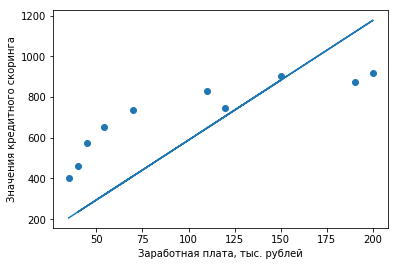

In [14]:
w0 = 0
y_pred = w0 + w1 * X[0]
plt.scatter(X[0], y[0])
plt.plot(X[0], y_pred[0])
plt.xlabel('Заработная плата, тыс. рублей')
plt.ylabel('Значения кредитного скоринга')

In [15]:
mse_(y=y[0], y_pred = y_pred[0])

56516.85841571941

3. Расчет с использованием intercept

In [16]:
X = np.vstack([np.ones((1, 10)), X])
X

array([[  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.],
       [ 35.,  45., 190., 200.,  40.,  70.,  54., 150., 120., 110.]])

In [17]:
W = np.linalg.inv(np.dot(X, X.T)) @ X @ y.T
W

array([[444.17735732],
       [  2.62053888]])

Text(0, 0.5, 'Значения кредитного скоринга')

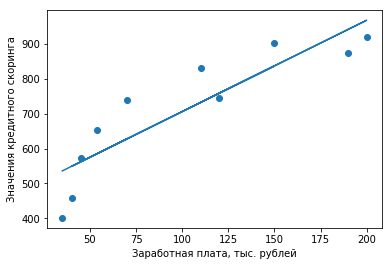

In [18]:
w0 = W[0]
w1 = W[1]
y_pred = w0 + w1 * X[1]
plt.scatter(X[1], y[0])
plt.plot(X[1], y_pred)
plt.xlabel('Заработная плата, тыс. рублей')
plt.ylabel('Значения кредитного скоринга')

In [19]:
mse_(y=y[0])

6470.414201176658

# Задание 2   
Посчитать коэффициент линейной регрессии при заработной плате (zp),    
используя градиентный спуск (без intercept).

In [20]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n = X.shape[0]

In [21]:
def mse_(w1, y=y, X=X, n=n):
    return np.sum((w1 * X - y) ** 2) / n

In [22]:
alpha = 1e-7
w1 = 0.1

In [23]:
for i in range(6000):
    w1 -= alpha * (2 / n) * np.sum((w1 * X - y) * X)
    if i % 500 == 0:
        print(f'Iteration: {i}, w1 = {w1}, mse = {mse_(w1)}')

Iteration: 0, w1 = 0.115952808, mse = 515794.9112047831
Iteration: 500, w1 = 4.436601977832683, mse = 85610.88627620287
Iteration: 1000, w1 = 5.524061455274668, mse = 58359.886733764004
Iteration: 1500, w1 = 5.7977629451654105, mse = 56633.609296601324
Iteration: 2000, w1 = 5.866650574656343, mse = 56524.254269626384
Iteration: 2500, w1 = 5.883988826993857, mse = 56517.326923148226
Iteration: 3000, w1 = 5.888352672815523, mse = 56516.888094403395
Iteration: 3500, w1 = 5.88945100441116, mse = 56516.860295784114
Iteration: 4000, w1 = 5.889727442292625, mse = 56516.85853481644
Iteration: 4500, w1 = 5.889797018641524, mse = 56516.8584232639
Iteration: 5000, w1 = 5.889814530236905, mse = 56516.85841619732
Iteration: 5500, w1 = 5.889818937711242, mse = 56516.858415749695


w1 = 5.889818937711242    
mse = 56516.858415749695

# Задание 3   
В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез    
используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?  

Таблица значений функции Лапласа используется в случае, когда известно, что случайная величена имеет    
нормальное распределение, а также известны математическое ожидание и дисперсия.

Таблица критических точек распределения Стьюдента используется при оценке математического ожидания нормального   
распределения при неизвестной дисперсии. Распределение Стьюдента не зависит от этих параметров. Зависит только от    
величины выборки. При большом n  приближается к нормальному распределению, поэтому подходит для маленьких выборок.

# Задание 4   
Произвести вычисления как в пункте 2, но с вычислением intercept.    
Учесть, что изменение коэффициентов должно производиться   
на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на    
изменение другого во время одной итерации).

In [24]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n = X.shape[0]
alpha = 1e-5
w0 = 10
w1 = 0.1

In [25]:
def mse_(w0, w1, y=y, X=X, n=n):
    return np.sum((w0 + w1 * X - y) ** 2) / n

In [26]:
for i in range(2500000):
    w0 -= alpha * (2 / n) * np.sum(w0 + w1 * X - y)
    w1 -= alpha * (2 / n) * np.sum((w0 + w1 * X - y) * X)
    if i % 200000 == 0:
        print(f'Iteration: {i}, w0 = {w0}, w1 = {w1}, mse = {mse_(w0, w1)}')

Iteration: 0, w0 = 10.0137952, w1 = 1.6749728233344003, mse = 290541.55503052374
Iteration: 200000, w0 = 286.78705278137215, w1 = 3.778995233414747, mse = 12754.127277342204
Iteration: 400000, w0 = 387.11718621444976, w1 = 3.040524838996752, mse = 7296.31242892647
Iteration: 600000, w0 = 423.4908027329192, w1 = 2.772800297847609, mse = 6578.96592439067
Iteration: 800000, w0 = 436.6776682673352, w1 = 2.675739629640357, mse = 6484.681669269981
Iteration: 1000000, w0 = 441.4584252903516, w1 = 2.6405513227618616, mse = 6472.289442211679
Iteration: 1200000, w0 = 443.1916376032741, w1 = 2.6277941785566483, mse = 6470.660673004487
Iteration: 1400000, w0 = 443.81999518497025, w1 = 2.623169212404279, mse = 6470.446596138574
Iteration: 1600000, w0 = 444.0477995038817, w1 = 2.621492480404826, mse = 6470.418459000229
Iteration: 1800000, w0 = 444.13038752258706, w1 = 2.6208845991565846, mse = 6470.414760802614
Iteration: 2000000, w0 = 444.1603289252199, w1 = 2.6206642183133106, mse = 6470.414274730

w0 = 444.17511920105136   
w1 = 2.6205553558962777   
mse = 6470.414202447314